# Analyse descriptive de la base de données 

### Importation de la base

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from functools import reduce
from operator import add
import spacy
from spacy import displacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French

In [2]:
df = pd.read_csv("/Users/Nadir/Documents/Statapp/2019-01-08-editos-radio.csv")

On enlève les "\n" 

In [3]:
df['auteur'] = df['auteur'].apply(lambda x: " ".join(str(x).split()))

In [4]:
df['texte']= df['texte'].apply(lambda x: " ".join((str(x).split())))

### Statistiques descriptives structurelles

In [5]:
df.head()

,emission,date,auteur,texte
0,Europe1 Nay,2015-12-05,Catherine Nay,"Avec un chômage au plus bas, la chancelière au..."
1,Europe1 Nay,2015-12-12,Catherine Nay,"Donald Trump, à 69 ans, pèse 4 milliards de do..."
2,Europe1 Nay,2015-12-19,Catherine Nay,W.B. : François Hollande revient dans la cours...
3,Europe1 Nay,2016-01-02,Catherine Nay,Que ce soit sur la déchéance de nationalité ou...
4,Europe1 Nay,2016-01-09,Catherine Nay,"WB : Hier, cela faisait 20 ans que François Mi..."


In [6]:
df.describe()

,emission,date,auteur,texte
count,2256,2256,2256,2256
unique,7,697,28,2255
top,RTL Ventura,2019-01-02,Alba Ventura,"Bonjour Catherine, Bonjour Bernard, bonjour à ..."
freq,483,7,416,2


In [7]:
df.emission.unique()

array(['Europe1 Nay', 'RTL Duhamel', 'RTL Ventura', 'FrCulture Says',
       'FrInter Legrand', 'FrInter Seux', 'Europe1 Darmon'], dtype=object)

In [8]:
print("Nombre d'émissions différentes dans la base :", len(df.emission.unique()))

Nombre d'émissions différentes dans la base : 7


In [9]:
df.auteur.unique()

array(['Catherine Nay', 'Alain Duhamel', 'Benjamin Sportouch',
       'Olivier Bost', 'Alba Ventura', 'Dominique Tenza',
       'Vincent Derosier', 'Julien Fautrat', 'Frédéric Says', 'nan',
       'Frédéric Says Ludovic Piedtenu', 'Olivier Mazerolle',
       'Thomas Legrand', 'Dominique Seux', 'Nicolas Domenach',
       'Frédéric Métézeau', 'Jean-Marc Vittori', 'Arnaud Le Gal',
       'Carine Bécard', 'Etienne Lefebvre', 'Ludovic Piedtenu',
       'Solveig Godeluck', 'Yaël Goosz', 'La rédaction numérique de RTL',
       'Fabienne Schmitt', 'Michaël Darmon', 'Stéphane Robert',
       'Sophie Delpont'], dtype=object)

In [10]:
print("Nombre d'éditorialistes différents dans la base :", len(df.auteur.unique()))

Nombre d'éditorialistes différents dans la base : 28


<AxesSubplot:title={'center':"Nombre d'articles dans la base pour chaque émission"}, xlabel='emission', ylabel='texte'>

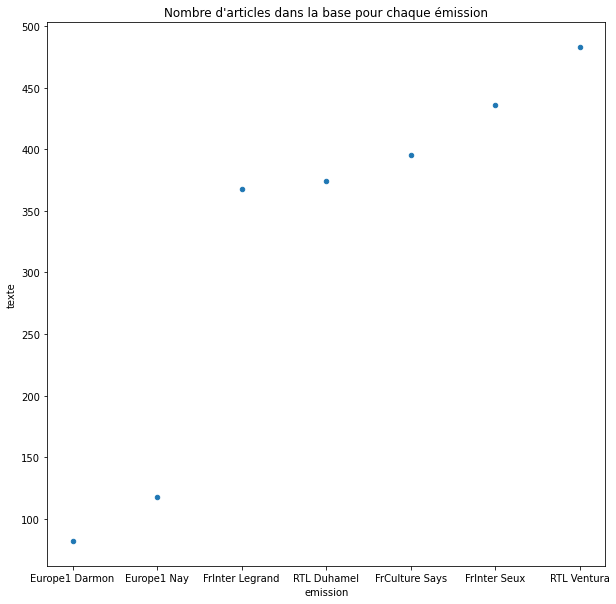

In [11]:
pd.DataFrame(df.groupby('emission')['texte'].count().reset_index()).sort_values(by =['texte']).plot.scatter(x='emission', 
                                                                                                            y= 'texte', figsize = (10,10), title = "Nombre d'articles dans la base pour chaque émission")

<AxesSubplot:title={'center':'Répartition de la longueur des éditos'}>

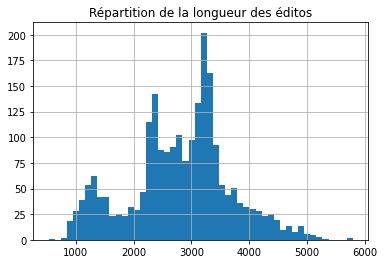

In [12]:
%matplotlib inline
plt.title('Répartition de la longueur des éditos')
df.texte.apply(len).hist(bins=50)

In [13]:
df.texte.apply(len).describe()

count    2256.000000
mean     2809.177305
std       883.319599
min       526.000000
25%      2308.000000
50%      2902.000000
75%      3322.000000
max      5799.000000
Name: texte, dtype: float64

### Statistiques descriptives textuelles

In [23]:
text = df.texte.iloc[12]

In [24]:
nlp=spacy.load('fr_core_news_sm')

In [25]:
doc=nlp(text)

In [31]:
displacy.render(doc, style="ent")

Idées : 

- ajouter en feature de chaque article des personnes/lieux/organisations les plus cités pour essayer de déagager le thème général de l'article. 

- regarder dans toute la base dans quel(s) contexte(s) une certaine personnalité politique est évoquée